# Grupo 14 - Projeto final Introdução a Ciência dos Dados - Parte 3
## Classificação
* Ana Flávia Ciríaco
* Breno Poggiali de Sousa
* Gabriela Peres Neme

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Clique aqui para ver ou esconder o código."></form>''')

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from scipy import stats


import os

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
plt.rcParams['figure.figsize']  = (20, 10)
sns.set(style="darkgrid")

In [5]:
data = pd.read_csv('./athlete_events.csv')
regions = pd.read_csv('./noc_regions.csv')

data = pd.merge(data, regions, on='NOC', how='left')

In [6]:
men = data.loc[data['Sex'] == 'M']
men_summer = men.loc[men['Season'] == 'Summer']
men_winter = men.loc[men['Season'] == 'Winter']

women = data.loc[data['Sex'] == 'F']
women_summer = women.loc[women['Season'] == 'Summer']
women_winter = women.loc[women['Season'] == 'Winter']

summer = data.loc[data['Season'] == 'Summer']
winter = data.loc[data['Season'] == 'Winter']

# Regressão logística para entender o crescimento da participação de mulheres nas Olimpíadas

Aqui iremos fazer a análise do crescimento da participação entre homens e mulheres. Nessa primeira análise, para as Jogos de Verão plotaremos dois gráficos:

O 1º mostrando a porcentagem de ambos os gêneros em cada edição das Olimpíadas desde 1896. Onde podemos perceber que, na primeira edição, só haviam homens e, a partir de 1900, começaram a haver algumas participações de mulheres que foram crescendo até os dias atuais. Mas é bem claro, também, que até a última edição, nos jogos do Rio, ainda é predominante a participação de homens, o que não reflete exatamente a nossa sociedade mundial de maioria feminina.

Já no 2º gráfico, utilizaremos a porcentagem de participação feminina obtida no primeiro e, utilizando uma regressão logística, iremos tentar prever quando que chegaremos numa porcentagem de 50%/50% entre homens e mulheres. Logo depois, plotaremos o R2 daquela regressão para mostrar o quão confiável ela é.

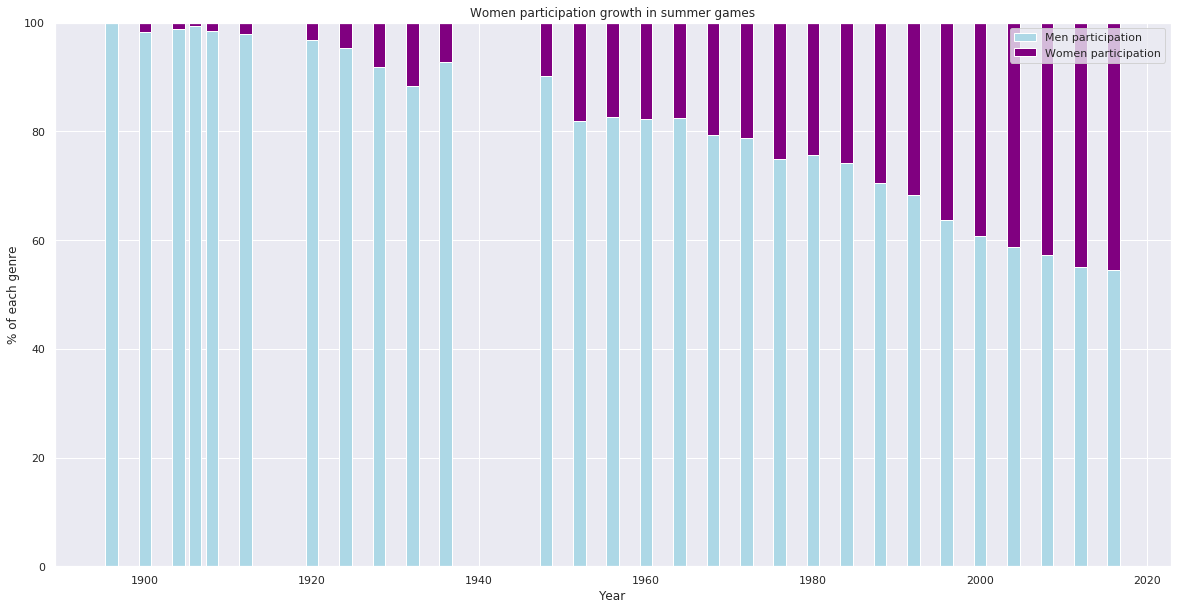

In [7]:
men_summer_num = men_summer.groupby(['Year']).size()
women_summer_num = women_summer.groupby(['Year']).size()
years = np.sort(np.array(summer['Year'].unique()))

men_size = np.array([])
women_size = np.array([])
for year in years:
    if year in women_summer_num:
        women_size = np.append(women_size, women_summer_num[year])
    else:
        women_size = np.append(women_size, 0)
    if year in men_summer_num:
        men_size = np.append(men_size, men_summer_num[year])
    else:
        men_size = np.append(men_size, 0)

r = np.sort(np.array(summer['Year'].unique()))
raw_data = {'men': men_size, 'women': women_size}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['men'], df['women'])]
menBars = [i / j * 100 for i,j in zip(df['men'], totals)]
womenBars = [i / j * 100 for i,j in zip(df['women'], totals)]
   
# plot
barWidth = 1.5
# Create men Bars
plt.bar(r, menBars, color='lightblue', edgecolor='white', width=barWidth, label="Men participation")
# Create women Bars
plt.bar(r, womenBars, bottom=menBars, color='purple', edgecolor='white', width=barWidth, label="Women participation")


plt.title('Women participation growth in summer games')
plt.ylabel('% of each genre')
plt.xlabel('Year')
plt.legend()
plt.show()

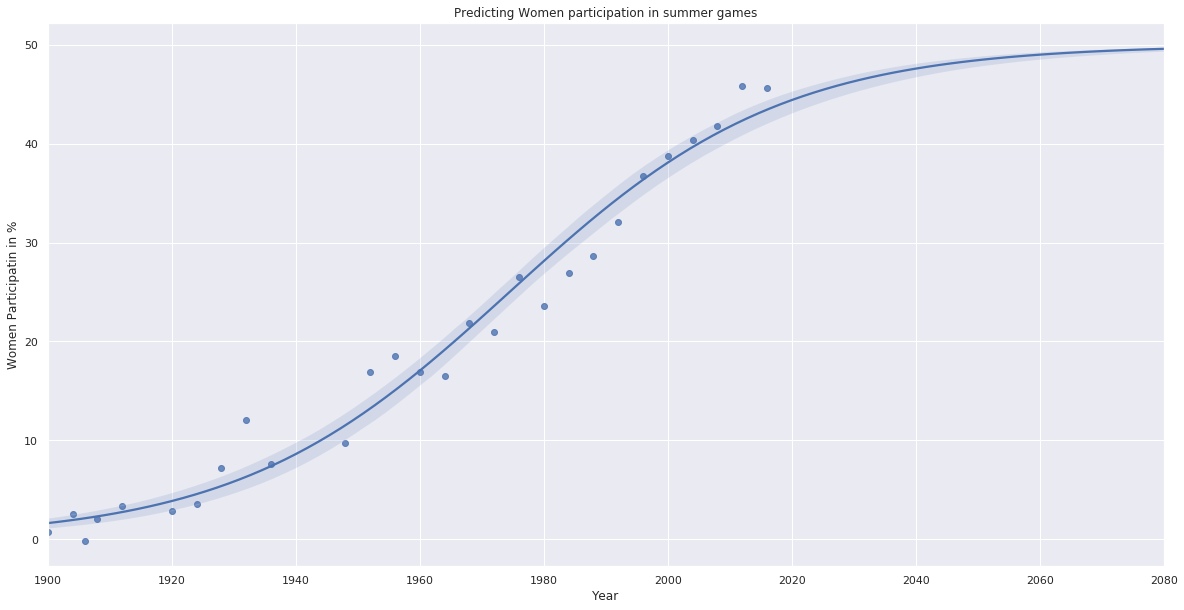

A regressão acima possui um r2 =  0.9578479113235534


In [8]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

women_part = pd.DataFrame(data={'Year': years, 'Simplified': np.arange(29)+1,'Women Participation': womenBars})
women_part['Women Participation'] = women_part['Women Participation']/50
plt.figure()
plt.xlim(min(women_part[1:]['Year']), 2080)
sns.regplot(x='Year', y='Women Participation', data=women_part[1:], logistic=True, n_boot=500, y_jitter=.03)
plt.title('Predicting Women participation in summer games')
plt.yticks([0,0.2,0.4,0.6,0.8,1], [0, 10, 20, 30, 40, 50], rotation=0)
plt.ylabel('Women Participatin in %')
plt.show()

print("A regressão acima possui um r2 = ", r2(women_part[1:]['Year'], women_part[1:]['Women Participation']))


Aqui repetimos o processo acima, dessa vez, focando nas Olimpíadas de Inverno. Nesse caso, é interessante perceber que, de acordo com a regressão, demoraremos, em média, duas décadas a mais para chegar numa igualidade entre os dois gêneros.

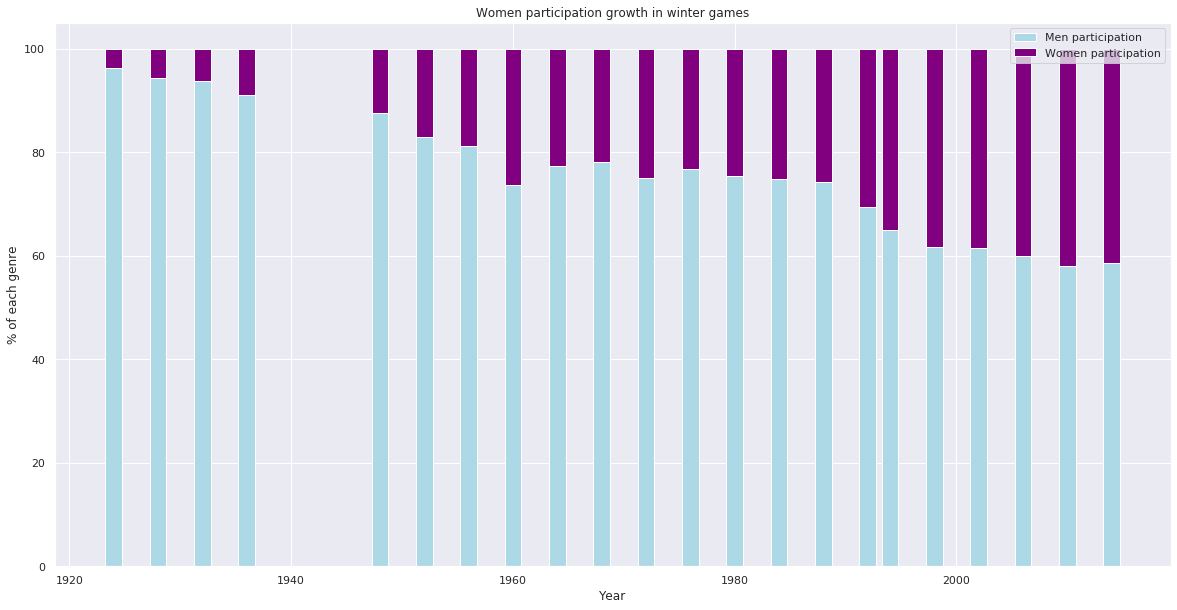

In [9]:
men_winter_num = men_winter.groupby(['Year']).size()
women_winter_num = women_winter.groupby(['Year']).size()
years = np.sort(np.array(winter['Year'].unique()))

men_size = np.array([])
women_size = np.array([])
for year in years:
    if year in women_winter_num:
        women_size = np.append(women_size, women_winter_num[year])
    else:
        women_size = np.append(women_size, 0)
    if year in men_winter_num:
        men_size = np.append(men_size, men_winter_num[year])
    else:
        men_size = np.append(men_size, 0)

r = np.sort(np.array(winter['Year'].unique()))
raw_data = {'men': men_size, 'women': women_size}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['men'], df['women'])]
menBars = [i / j * 100 for i,j in zip(df['men'], totals)]
womenBars = [i / j * 100 for i,j in zip(df['women'], totals)]
   
# plot
barWidth = 1.5
# Create men Bars
plt.bar(r, menBars, color='lightblue', edgecolor='white', width=barWidth, label="Men participation")
# Create women Bars
plt.bar(r, womenBars, bottom=menBars, color='purple', edgecolor='white', width=barWidth, label="Women participation")


plt.title('Women participation growth in winter games')
plt.ylabel('% of each genre')
plt.xlabel('Year')
plt.legend()
plt.show()

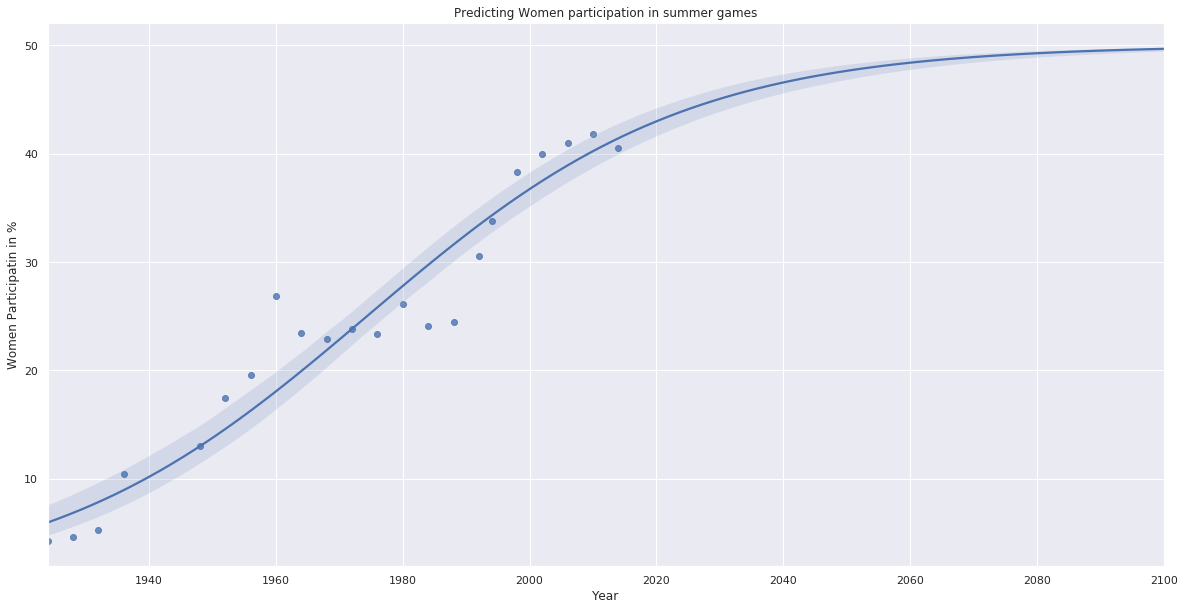

A regressão acima possui um r2 =  0.9411076062059351


In [10]:
women_part = pd.DataFrame(data={'Year': years, 'Simplified': np.arange(22)+1,'Women Participation': womenBars})
women_part['Women Participation'] = women_part['Women Participation']/50
plt.figure()
plt.xlim(min(women_part['Year']), 2100)
sns.regplot(x='Year', y='Women Participation', data=women_part, logistic=True, n_boot=500, y_jitter=.03)
plt.title('Predicting Women participation in summer games')
plt.yticks([0.2,0.4,0.6,0.8,1], [10, 20, 30, 40, 50], rotation=0)
plt.ylabel('Women Participatin in %')
plt.show()

print("A regressão acima possui um r2 = ", r2(women_part[1:]['Year'], women_part[1:]['Women Participation']))

# Análise exploratória comparando medalhas dos EUA e da URSS durante a Guerra Fria

Já aqui, tentamos fazer uma análise mais simples comparando a competitividade entre os Estados Unidos e a União Soviética durante o período da Guerra Fria. É interessante perceber nessa análise que ambas as potências estavam muito próximas em seus resultados. Inclusive, juntando ao conhecimento histórico amplamente conhecido sobre o assunto, as Olimpíadas eram somente uma das diversas formas que os dois países tinham para competir entre si, sendo os mais famosos a Corrida Espacial e a Crise dos mísseis de Cuba. 

Outro dado que pode ser extraído dessa análise é que, nas Olimpíadas de 1980 e de 1984, a URSS e os EUA venceram, respectivamente, com muita folga. Isso porque, em 1980 os jogos foram realizados em Moscou e os Estados Unidos boicotaram, não levando nenhum atleta para lá, e a mesma coisa aconteceu 4 anos depois quando os jogos foram realizados em Los Angeles nos EUA.

Vitórias totais:<br>
EUA: 4<br>
URSS: 6

In [11]:
def add_row(df, row):
    df.loc[-1] = row
    df.index = df.index + 1  
    return df.sort_index()

usa = data.loc[
                (data['Season'] == 'Summer') & 
               (data['NOC'] == 'USA') & 
               (data['Year'] >= 1952) & 
               (data['Year'] <= 1988)
              ] # Min and Max years that urss played in the olympics 
urss = data.loc[
                (data['Season'] == 'Summer') &
                (data['NOC'] == 'URS')
               ]
years = np.sort(np.unique(np.array(
                            data[((data['Season'] == 'Summer') & 
                                  (data['Year'] >= 1952) &
                                  (data['Year'] <= 1988))]
                            ['Year'])))
# Normalize USA Medals
usa_medals = usa[usa['Medal'].notnull()].groupby(['Year', 'Medal', 'Event']).size().reset_index()
usa_medals[0] = 1
usa_medals = usa_medals.groupby(['Year', 'Medal']).size().reset_index()
add_row(usa_medals, [1980, 'Gold', 0])
add_row(usa_medals, [1980, 'Silver', 0])
add_row(usa_medals, [1980, 'Bronze', 0])
usa_medals = usa_medals.sort_values(by='Year')

# Normalize URSS Medals
urss_medals = urss[urss['Medal'].notnull()].groupby(['Year', 'Medal', 'Event']).size().reset_index()
urss_medals[0] = 1
urss_medals = urss_medals.groupby(['Year', 'Medal']).size().reset_index()
add_row(urss_medals, [1984, 'Gold', 0])
add_row(urss_medals, [1984, 'Silver', 0])
add_row(urss_medals, [1984, 'Bronze', 0])
urss_medals = urss_medals.sort_values(by='Year')

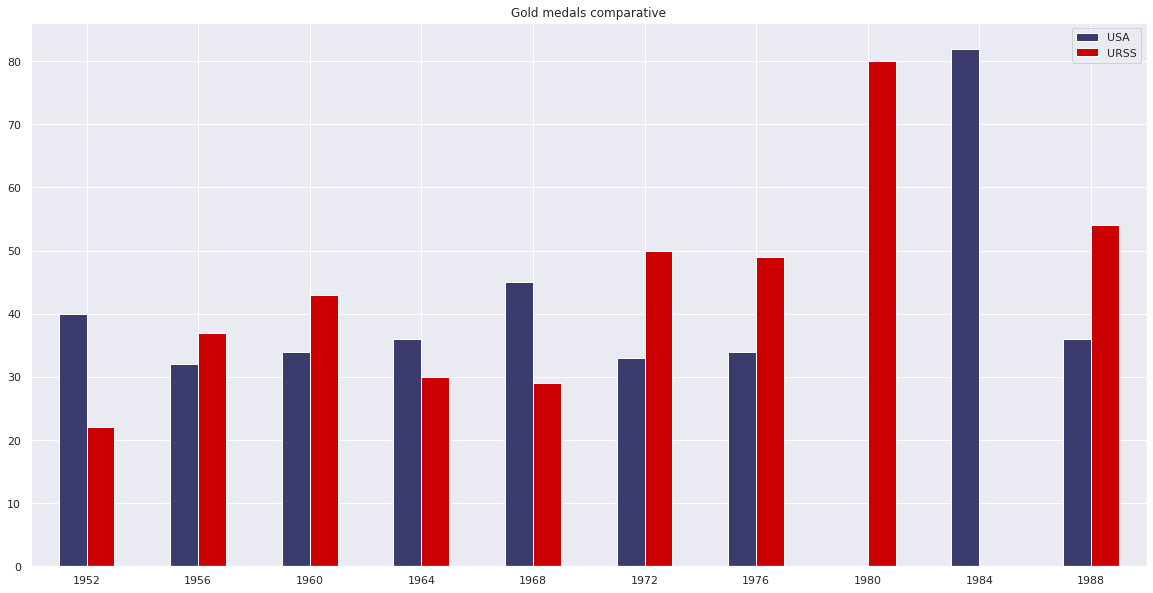

In [12]:
# USA Gold Medals
usa_gold = usa_medals.loc[usa_medals['Medal']=='Gold'][0].reset_index()[0]

# URSS Gold Medals
urss_gold = urss_medals.loc[urss_medals['Medal']=='Gold'][0].reset_index()[0]

gold_compare = pd.DataFrame(data={'Year': years, 'USA': usa_gold, 'URSS': urss_gold})

gold_compare[['USA', 'URSS']].plot(kind='bar', color=['#3C3B6E', '#CD0000'])
plt.title('Gold medals comparative')
plt.xticks([0,1,2,3,4,5,6,7,8,9], years, rotation=0)
plt.legend()
plt.show()

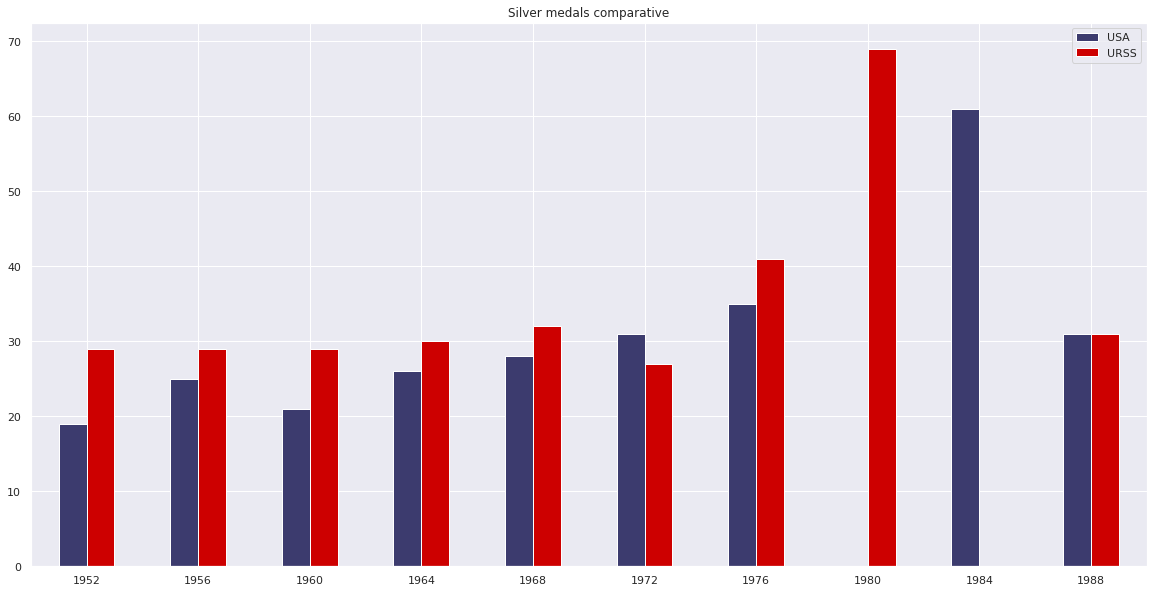

In [13]:
# USA Silver Medals
usa_silver = usa_medals.loc[usa_medals['Medal']=='Silver'][0].reset_index()[0]

# URSS Silver Medals
urss_silver = urss_medals.loc[urss_medals['Medal']=='Silver'][0].reset_index()[0]

silver_compare = pd.DataFrame(data={'Year': years, 'USA': usa_silver, 'URSS': urss_silver})

silver_compare[['USA', 'URSS']].plot(kind='bar', color=['#3C3B6E', '#CD0000'])
plt.title('Silver medals comparative')
plt.xticks([0,1,2,3,4,5,6,7,8,9], years, rotation=0)
plt.legend()
plt.show()

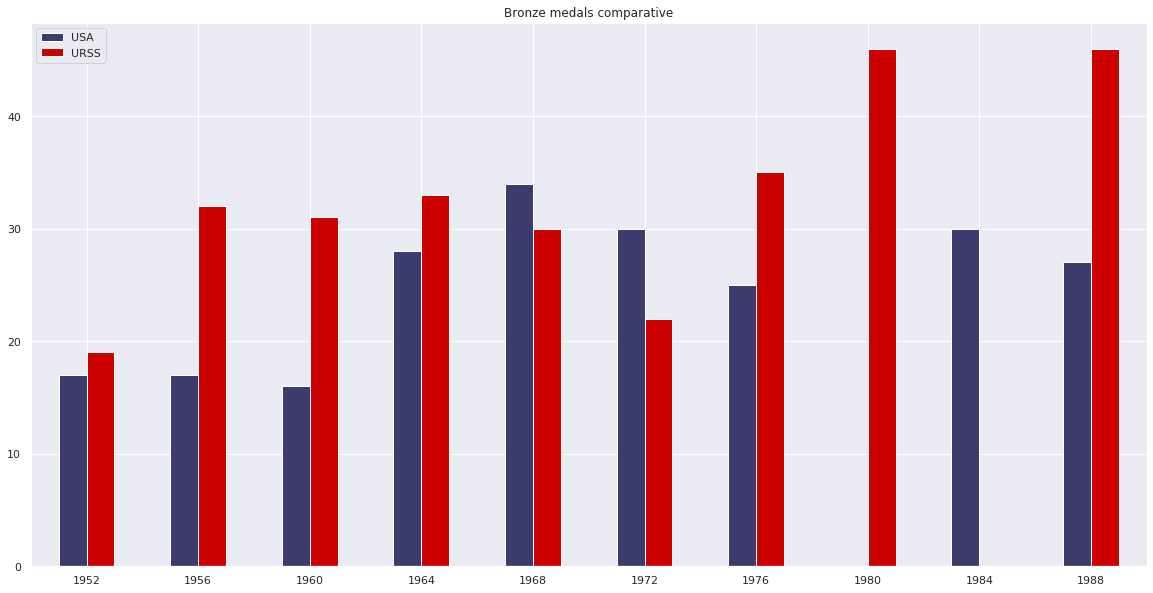

In [14]:
# USA Bronze Medals
usa_bronze = usa_medals.loc[usa_medals['Medal']=='Bronze'][0].reset_index()[0]

# URSS Silver Medals
urss_bronze = urss_medals.loc[urss_medals['Medal']=='Bronze'][0].reset_index()[0]

bronze_compare = pd.DataFrame(data={'Year': years, 'USA': usa_bronze, 'URSS': urss_bronze})

bronze_compare[['USA', 'URSS']].plot(kind='bar', color=['#3C3B6E', '#CD0000'])
plt.title('Bronze medals comparative')
plt.xticks([0,1,2,3,4,5,6,7,8,9], years, rotation=0)
plt.legend()
plt.show()